In [20]:
import pandas as pd

data_path = '다문화_통합데이터.csv'
data = pd.read_csv(data_path, encoding='utf-8')

data_info = data.info()
data_head = data.head()

(data_info, data_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 135 entries, 행정구 to 2022_특별학급수
dtypes: float64(27), int64(107), object(1)
memory usage: 26.5+ KB


(None,
    행정구  2022_초등학교_계  2022_초등학교_국제결혼가정  2022_초등학교_외국인가정  2022_중학교_계  \
 0  종로구          163               117               46          72   
 1   중구          269               142              127          72   
 2  용산구          408               254              154         139   
 3  성동구          439               315              124         135   
 4  광진구          505               306              199         140   
 
    2022_중학교_국제결혼가정  2022_중학교_외국인가정  2022_고등학교_계  2022_고등학교_국제결혼가정  \
 0               67               5           84                65   
 1               50              22           99                58   
 2              106              33           79                57   
 3              107              28           47                41   
 4               78              62           65                49   
 
    2022_고등학교_외국인가정  ...  다문화가족복지센터개수  다문화언어강사인원  어린이복지센터개수  2020_인구  \
 0               19  ...            1          6         11   151581   

## 상관계수 분석은 의미없음 너무 많아

In [21]:
data['2022_특별학급수'].fillna(0, inplace=True)

missing_values_after = data.isnull().sum().sum()

missing_values_after


0

In [22]:
from sklearn.preprocessing import StandardScaler

data_numeric = data.drop(columns=['행정구'])

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_numeric)

data_scaled_df = pd.DataFrame(data_scaled, columns=data_numeric.columns)

data_scaled_df.describe().round(2)


,2022_초등학교_계,2022_초등학교_국제결혼가정,2022_초등학교_외국인가정,2022_중학교_계,2022_중학교_국제결혼가정,2022_중학교_외국인가정,2022_고등학교_계,2022_고등학교_국제결혼가정,2022_고등학교_외국인가정,2022_초등학생_국내출생자녀_소계,...,다문화가족복지센터개수,다문화언어강사인원,어린이복지센터개수,2020_인구,2020_1인당 지역내총생산_천원,2020_수준지수,년도,2022_출생,2022_중점학교수,2022_특별학급수
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,...,25.00,25.00,25.00,25.00,25.00,25.00,25.0,25.00,25.00,25.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.0,-0.00,-0.00,-0.00
std,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,...,1.02,1.02,1.02,1.02,1.02,1.02,0.0,1.02,1.02,1.02
min,-1.21,-1.82,-0.70,-1.13,-1.62,-0.63,-1.10,-1.26,-0.95,-1.84,...,-3.39,-1.25,-1.94,-2.14,-0.55,-0.55,0.0,-4.90,-0.54,-0.69
25%,-0.45,-0.54,-0.58,-0.52,-0.60,-0.49,-0.70,-0.72,-0.72,-0.47,...,0.29,-0.78,-0.78,-0.54,-0.52,-0.52,0.0,0.20,-0.54,-0.69
50%,-0.16,0.02,-0.33,-0.34,-0.18,-0.33,-0.28,-0.21,-0.44,0.09,...,0.29,0.17,0.25,0.04,-0.37,-0.37,0.0,0.20,-0.54,-0.69
75%,0.22,0.51,-0.04,0.08,0.67,-0.11,0.43,0.33,0.20,0.48,...,0.29,1.12,0.90,0.45,-0.04,-0.04,0.0,0.20,0.14,0.58
max,3.24,2.32,2.99,3.73,2.75,3.59,3.30,3.24,2.78,2.13,...,0.29,2.06,1.28,2.28,4.15,4.15,0.0,0.20,2.86,3.13


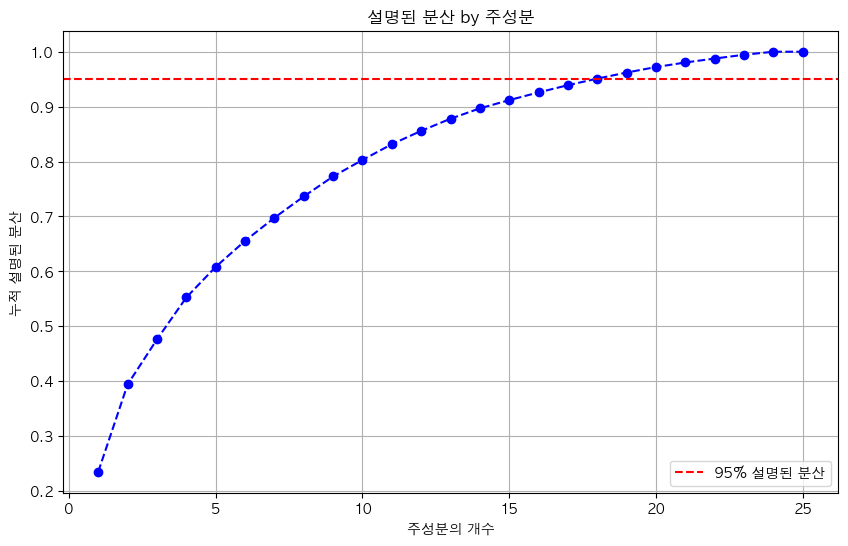

,Principal Component,Explained Variance,Cumulative Explained Variance
0,1,0.235026,0.235026
1,2,0.158939,0.393965
2,3,0.082053,0.476018
3,4,0.076402,0.552420
4,5,0.055704,0.608124
5,6,0.047342,0.655466
6,7,0.042079,0.697545
7,8,0.038798,0.736344
8,9,0.036461,0.772805
9,10,0.030075,0.802880


In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit(data_scaled)

explained_variance = data_pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')
plt.title('설명된 분산 by 주성분')
plt.xlabel('주성분의 개수')
plt.ylabel('누적 설명된 분산')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% 설명된 분산')
plt.legend(loc='lower right')
plt.show()

explained_variance_table = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Explained Variance': explained_variance.cumsum()
})

explained_variance_table.head(10)


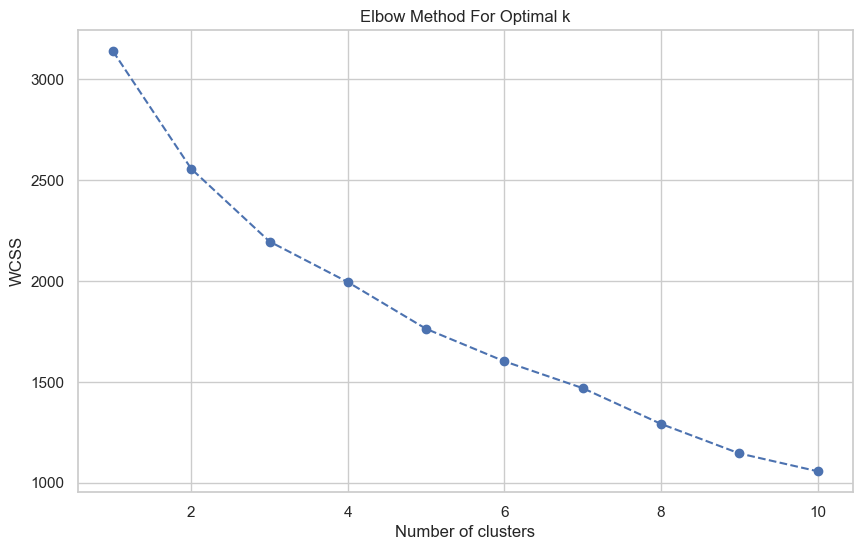

In [24]:
from sklearn.cluster import KMeans
import seaborn as sns

pca_95 = PCA(n_components=0.95)
data_pca_95 = pca_95.fit_transform(data_scaled)

wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_pca_95)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


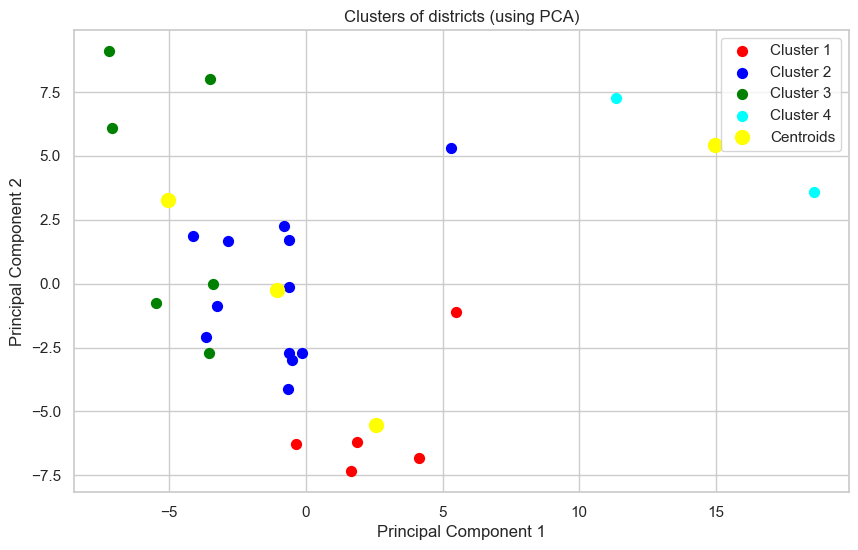

,행정구,Cluster
0,종로구,2
1,중구,2
2,용산구,2
3,성동구,1
4,광진구,1
5,동대문구,1
6,중랑구,1
7,성북구,1
8,강북구,1
9,도봉구,1


In [25]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
data_clustered = kmeans.fit_predict(data_pca_95)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca_95[data_clustered == 0, 0], data_pca_95[data_clustered == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca_95[data_clustered == 1, 0], data_pca_95[data_clustered == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca_95[data_clustered == 2, 0], data_pca_95[data_clustered == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca_95[data_clustered == 3, 0], data_pca_95[data_clustered == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of districts (using PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

data['Cluster'] = data_clustered

data[['행정구', 'Cluster']]


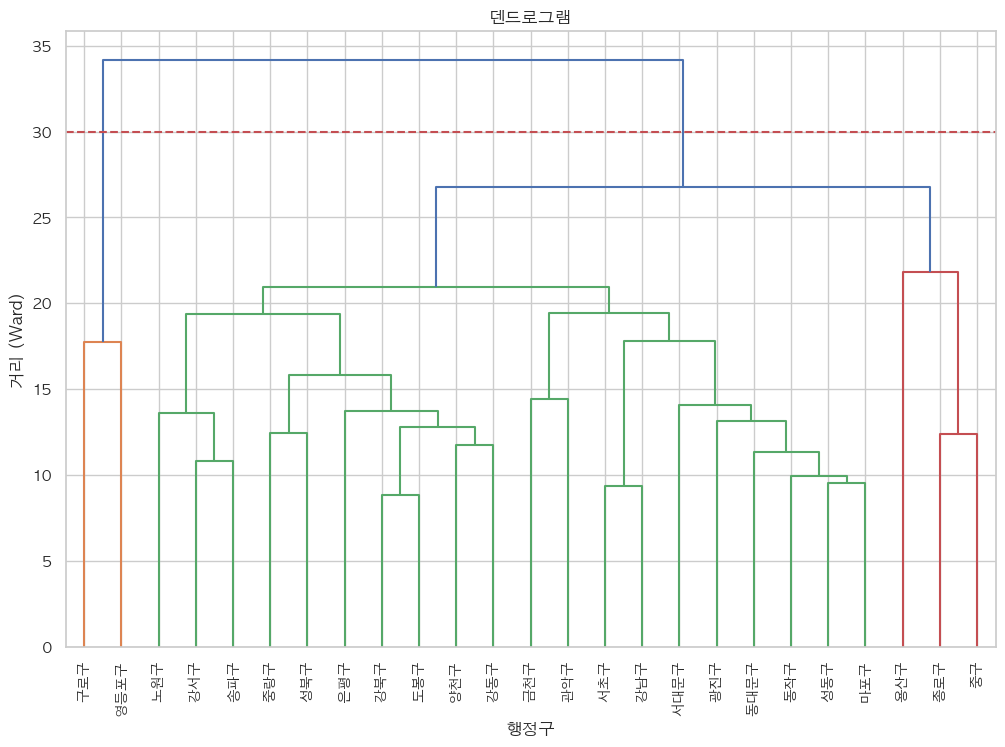

In [28]:
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=data['행정구'].values,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title('덴드로그램')
plt.xlabel('행정구')
plt.ylabel('거리 (Ward)')
plt.axhline(y=30, color='r', linestyle='--')
plt.show()


In [29]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 4

data['Hierarchical_Cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

data[['행정구', 'Hierarchical_Cluster']]


,행정구,Hierarchical_Cluster
0,종로구,3
1,중구,3
2,용산구,4
3,성동구,2
4,광진구,2
5,동대문구,2
6,중랑구,2
7,성북구,2
8,강북구,2
9,도봉구,2


/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


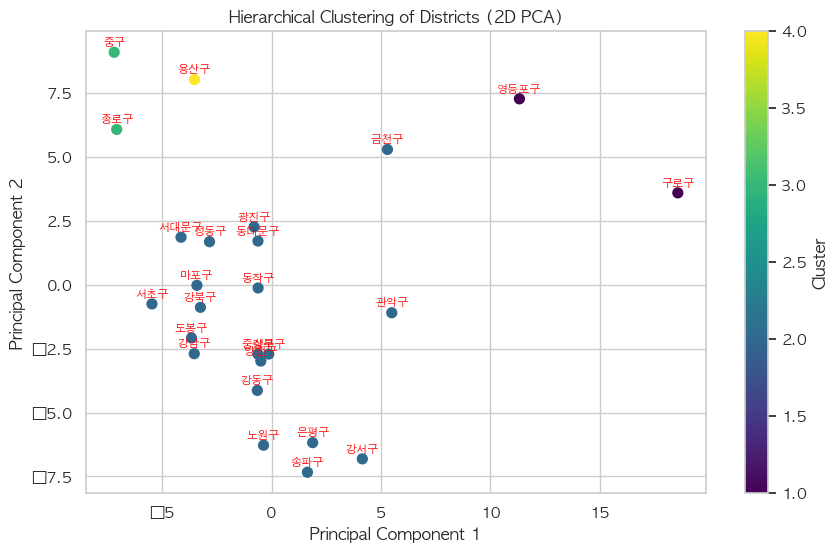

In [30]:
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=data['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering of Districts (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(data['행정구']):
    plt.annotate(txt, (data_pca_2d[i, 0], data_pca_2d[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='red')

plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


## 다문화 친화적인 클러스터를 구분하려면 어떻게 해야하지?
- 어떤 변수를 바라봐야 할까?

2022_초등학교_계, 2022_초등학교_외국인가정, 2022_중학교_국제결혼가정, 2022_중학교_외국인가정, 2022_고등학교_국제결혼가정, 2022_고등학교_외국인가정, 2022_초등학생_국내출생자녀_소계, 2022_초등학생_외국인가정자녀_소계, 2022_초등학생_중도입국자녀_소계,2022_다문화가구_소계, 2022_가구원_소계, 2018_다문화시민인식_종합, 2018_인구감소문제 해결 위해 외국인 이민정책 필요, 2018_결혼 이민자에 대한 사회적 편견해소 정책 필요, 2018_이민자 많아지면 일자리 빼앗길 것 같다, 등록외국인,중국외외국인체류인구수,사회적 신뢰_국내 거주 외국인,사회적 약자 수용 여부_외국인 노동자, 사회적 약자 수용 여부_난민, 서울시민 자부심, 서울시민 자부심,사회적 차별요인 순위_국적, 사회적 차별요인 순위_출신 지역, 사회적 차별요인 순위_종교, 우울감_경험률, 스트레스_체감도,사회적 약자에 대한 태도,지역사회 소속감_서로도움, 자원봉사활동 경험 여부, 다문화가족복지센터개수, 다문화언어강사인원,어린이복지센터개수,2022_중점학교수,2022_특별학급수



In [31]:
# 평균값
specified_multicultural_vars = [
    '2022_초등학교_계', '2022_초등학교_외국인가정', 
    '2022_중학교_국제결혼가정', '2022_중학교_외국인가정', 
    '2022_고등학교_국제결혼가정', '2022_고등학교_외국인가정', 
    '2022_초등학생_국내출생자녀_소계', '2022_초등학생_외국인가정자녀_소계', 
    '2022_초등학생_중도입국자녀_소계', '2022_다문화가구_소계', 
    '2022_가구원_소계', '2018_다문화시민인식_종합', 
    '2018_인구감소문제 해결 위해 외국인 이민정책 필요', 
    '2018_결혼 이민자에 대한 사회적 편견해소 정책 필요', 
    '2018_이민자 많아지면 일자리 빼앗길 것 같다', 
    '등록외국인', '중국외외국인체류인구수', '사회적 신뢰_국내 거주 외국인',
    '사회적 약자 수용 여부_외국인 노동자', '사회적 약자 수용 여부_난민', 
    '서울시민 자부심', '서울시민 자부심', '사회적 차별요인 순위_국적', 
    '사회적 차별요인 순위_출신 지역', '사회적 차별요인 순위_종교', 
    '우울감_경험률', '스트레스_체감도', '사회적 약자에 대한 태도', 
    '지역사회 소속감_서로도움', '자원봉사활동 경험 여부', '다문화가족복지센터개수', 
    '다문화언어강사인원', '어린이복지센터개수', '2022_중점학교수', '2022_특별학급수'
]

cluster_characteristics_specified = data.groupby('Hierarchical_Cluster')[specified_multicultural_vars].mean()

cluster_characteristics_specified.transpose()


Hierarchical_Cluster,1,2,3,4
2022_초등학교_계,1286.500000,468.300000,216.000000,408.000000
2022_초등학교_외국인가정,788.000000,107.150000,86.500000,154.000000
2022_중학교_국제결혼가정,180.500000,126.300000,58.500000,106.000000
2022_중학교_외국인가정,287.000000,32.450000,13.500000,33.000000
2022_고등학교_국제결혼가정,108.500000,57.850000,61.500000,57.000000
2022_고등학교_외국인가정,72.500000,19.900000,30.000000,22.000000
2022_초등학생_국내출생자녀_소계,436.500000,330.000000,116.500000,219.000000
2022_초등학생_외국인가정자녀_소계,788.000000,107.150000,86.500000,154.000000
2022_초등학생_중도입국자녀_소계,62.000000,31.150000,13.000000,35.000000
2022_다문화가구_소계,7159.000000,2693.350000,1252.500000,2259.000000


## 클러스터 특성 분석
클러스터 1
교육: 초, 중, 고등학교의 국제 결혼 및 외국인 가정 수가 상대적으로 많다.
다문화 가정: 다문화 가구 수가 높고, 초등학생 중 국내 출생자녀와 외국인 가정 자녀, 중도 입국자녀의 수가 다른 클러스터에 비해 높다.
사회적 인식: 다문화 시민 인식 점수와 이민자에 대한 편견 해소 정책 필요성이 높게 나타난다.
외국인: 등록 외국인과 중국 외 외국인 체류 인구수가 많다.
클러스터 1은 다문화 가정과 외국인이 많이 거주하는 지역으로, 다문화 시설과 인프라 확충이 필요할 것으로 보인다.

클러스터 2
교육: 초, 중, 고등학교의 국제 결혼 및 외국인 가정 수가 상대적으로 적다.
다문화 가정: 다른 클러스터에 비해 다문화 가구 수가 상대적으로 낮다.
사회적 인식: 다문화 시민 인식 점수가 낮고, 이민자에 대한 편견 해소 정책 필요성이 낮게 나타난다.
외국인: 외국인 체류 인구수가 적다.
클러스터 2는 다문화 가정과 외국인이 상대적으로 적게 거주하는 지역으로, 다른 지역에 비해 다문화 시설과 인프라의 확충이 상대적으로 덜 필요할 수 있다.

클러스터 3
교육: 초, 중, 고등학교의 국제 결혼 및 외국인 가정 수가 가장 적다.
다문화 가정: 다문화 가구 수가 가장 적다.
사회적 인식: 다문화 시민 인식 점수가 가장 낮고, 이민자에 대한 편견 해소 정책 필요성이 가장 낮게 나타난다.
외국인: 외국인 체류 인구수가 가장 적다.
클러스터 3은 다문화 가정과 외국인이 가장 적게 거주하는 지역으로, 다문화 시설과 인프라의 확충이 가장 덜 필요할 것으로 보인다.

클러스터 4
교육: 초, 중, 고등학교의 국제 결혼 및 외국인 가정 수가 중간 정도이다.
다문화 가정: 다문화 가구 수가 중간 정도이다.
사회적 인식: 다문화 시민 인식 점수와 이민자에 대한 편견 해소 정책 필요성이 중간 정도이다.
외국인: 외국인 체류 인구수가 중간 정도이다.
클러스터 4는 다문화 가정과 외국인이 적당한 비율로 거주하는 지역으로, 다문화 시설과 인프라의 확충이 적당히 필요할 것으로 보인다.

제안
클러스터 1: 다문화 관련 시설 및 프로그램 확대가 가장 필요한 지역이다.
클러스터 2, 4: 다문화 관련 시설 및 프로그램 확대가 필요한 정도를 더 자세히 분석해보고 결정할 필요가 있다.
클러스터 3: 다른 지역에 비해 다문화 관련 시설 및 프로그램 확대가 상대적으로 덜 필요할 것으로 보인다.

1. 인식 - 지수를 합쳐서 일점점수 이상(어떤 식으로 전처리하는지 그걸 트래킹을 잘해주세요 ㅠ)
2. 인구 - 줄이는게 우선임.  
3. 교육, 인프라 - 한 계소당 몇 명 수용하는지? 센터 개수로 그대로? 